# Sorting algorithms

## Comments

Sorting algorithms can be one of:
- Internal: Items are moved around in place, requiring not additional memory to be allocated.
- External: The procedure requires additional memory, to store information used in the sorting.

Any algorithm which is recursive can be converted to an equivalent iterative algorithm.<br>
(see example below)

## Bubblesort

Algorithm:

Iterate through the list, compare adjacent items, $x_i$ and $x_{i+1}$.
Swap the items if $x_i > x_{i+1}$ such that the larger value is later.

Order:

- Worst case = $O(n^2)$: Each pass puts just one element in the correct place, resulting in n passes, iterating over n items, giving $O(n^2)$.
- Best case = $O(n)$: The first pass puts every element in the correct place.
- Average case = $O(n^2)$

## Quicksort

Algorithm:

Pick the middle item of the array, which acts a pivot. Then compare the remaining values in the array with the pivot, splitting them into an array for smaller values and array for larger values.<br>
Sort the smaller and larger arrays in the same way, then append the smaller array, middle value and larger array. <br>
Sorting stops when an array reaches length 1, so doesn't need sorting.

In [1]:
# 3 functions for computing the factorial of a number

def factorial_recursive(n):
    if n<=1:
        return 1
    else:
        return n * factorial_recursive(n-1)
    
def factorial_tail_recursive(n):
    def iterate(n, product):
        if n<=1:
            return product
        else:
            return iterate(n-1, product*n)
    return iterate(n, 1)

def factorial_iterative(n):
    product = 1
    while n>1:
        product*=n
        n-=1
    return product

### Comments on the above

<code>factorial_recursive</code> is a recursive function and produces a recursive process.
In the line <code>return n * factorial_recursive(n-1)</code>, the program must keep track of what n is, evaluate
factorial_recursive(n-1) then return the product.

<code>factorial_tail_recursive</code> is also a recursive function but the process is iterative. <br>
In the line <code>return iterate(n-1, product*n)</code>, no information needs to be kept track of, the relevant variables are passed to the next iteration. <br>
These variables define the state of the iteration and are all the information required to compute the next step. <br>
Although the function is recursive, it should still occupy a constant amount of memory. However, for most languages,
any recursive function will occupy an increasing amount of memory, even if it is tail-recursive, and hence
produces an iterative process.

To get around iterative processes using increasing memory, languages use looping constructs like for or loop.
The <code>function factorial_iterative</code> is equivalent to <code>factorial_tail_recursive</code>, except that it uses a while loop and stores the state variables as local variables, instead of passing the state variables between function calls.

<code>factorial_tail_recursive :</code>
- Initialises the process by calling iterate(n, 1)
- Passes state variables to the next iteration by iterate(n-1, product*n)
- Stops iteration on the condition n<=1, where it returns the current value of product

<code>factorial_iterative :</code>
- Initialises the process, from the value of the argument n, and by initialising product as 1
- Passes state variables to the next iteration by keeping them stored in memory within the function
- Stops iteration on the condition n<=1, where product is left as it is, and is returned

In [14]:
import time
import matplotlib.pyplot as plt
import numpy as np

class Tester:
    def __init__(self, max_n, num_samples):
        self.max_n = max_n
        self.num_samples = num_samples
    def generate(self, n):
        for i in range(self.num_samples):
            yield self.generate_single(n)

    def generate_single(self, n):
        raise NotImplemented('Tester child must implment generate_single')
        
class ListTester(Tester):
    def generate_single(self, n):
        int_range = self.max_n*3
        return np.random.randint(0, high=int_range, size=n)
    
        
def time_function(func, x):
    start = time.time()
    func(x)
    end = time.time()
    return end - start

def plot_function_time(func, tester, label):
    sizes = np.zeros(tester.max_n-1)
    times = np.zeros(tester.max_n-1)
    stds = np.zeros(tester.max_n-1)
    for n in range(1, tester.max_n):
        sizes[n-1] = n
        samples = [time_function(func, x) for x in tester.generate(n)]
        times[n-1] = np.mean(samples)
        stds[n-1] = np.std(samples)
    plt.plot(sizes, times, label=label)
    plt.fill_between(x=sizes, y1=times-2*stds, y2=times+2*stds, alpha=0.2)
        
def plot_orders(orders):
    order_funcs = {"lnn": lambda x: np.log(x),
                   "nlnn": lambda x: x*np.log(x)}
    max_x = plt.xlim()[1]
    max_y = plt.ylim()[1]
    x = np.arange(1, max_x)
    for order in orders:
        func = None
        label = ""
        if type(order)==int:
            func = lambda x: x**order
            label = "n**{}".format(order)
        else:
            func = order_funcs[order]
            label = order
        y = func(x)
        y *= max_y/y[-1]
        plt.plot(x, y, label=label, linestyle=':')
        
def random_integers(n):
    rand_range = 3*n
    array = np.zeros(n)
    for i in range(array.size):
        array[i] = np.random.randint(rand_range)
    return array

In [10]:
# Bubble sort

def bubblesort(x):
    x = x.copy()
    swapped = True
    end = len(x)-1
    while swapped and end!=0:
        swapped = False
        for i in range(0, end):
            if x[i] > x[i+1]:
                first = x[i]
                x[i] = x[i+1]
                x[i+1] = first
                swapped = True
        end-=1
    return x

x = [1, 5, 3, 2, 5, 12, -1, 123]
bubblesort(x)

[-1, 1, 2, 3, 5, 5, 12, 123]

In [11]:
# Recursive Quicksort

def quicksort_recursive(x):
    if len(x)<=1:
        return x
    mid_i = len(x)//2-1
    mid = x[mid_i]
    lower, higher = [], []
    for i in range(len(x)):
        if i==mid_i:
            continue
        if x[i]<mid:
            lower.append(x[i])
        else:
            higher.append(x[i])
    return quicksort_recursive(lower) + [mid] + quicksort_recursive(higher)

quicksort_recursive(x)

[-1, 1, 2, 3, 5, 5, 12, 123]

In [6]:
# Iterative Quicksort

def quicksort_iterative(array):
    xs = [array]
    while len(xs)<len(array):
        for i in range(len(xs)):
            x = xs[i]
            if len(x)<=1:
                continue
            mid_i = len(x)//2 - 1
            mid = x[mid_i]
            lower, upper = [], []
            for j in range(len(x)):
                if j==mid_i:
                    continue
                if x[j]<mid:
                    lower.append(x[j])
                else:
                    upper.append(x[j])
            xs.pop(i)
            if len(upper)>0:
                xs.insert(i, upper)
            xs.insert(i, [mid])
            if len(lower)>0:
                xs.insert(i, lower)
    return [x[0] for x in xs]
            
quicksort_iterative(x)

[-1, 1, 2, 3, 5, 5, 12, 123]

In [7]:
def selection_sort(x):
    x = x.copy()
    for i in range( len(x)):
        min_i = i
        for j in range(i+1, len(x)):
            if x[j]<x[min_i]:
                min_i = j
        first = x[i]
        x[i] = x[min_i]
        x[min_i] = first
    return x

selection_sort(x)

[-1, 1, 2, 3, 5, 5, 12, 123]

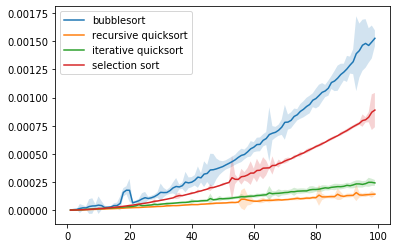

In [19]:
plot_function_time(bubblesort, ListTester(100, 20), 'bubblesort')
plot_function_time(quicksort_recursive, ListTester(100, 20), 'recursive quicksort')
plot_function_time(quicksort_iterative, ListTester(100, 20), 'iterative quicksort')
plot_function_time(selection_sort, ListTester(100, 20), 'selection sort')
#plot_orders([1, 2, 'nlnn'])
plt.legend()